# Can we predict who would've survived the Titanic?
### This notebook goes through a basic exploratory data analysis of the kaggle titanic dataset with python

In [1]:
!pip install missingno
!pip install catboost

In [2]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

## Loading in the dataset

After downloading the data in a folder name Kaggle titanic dataset

In [7]:
# Import train & test dataset

train = pd.read_csv(r"F:\kaggle_titanic_dataset\train.csv")
test = pd.read_csv(r"F:\kaggle_titanic_dataset\test.csv")
gender_submission = pd.read_csv(r"F:\kaggle_titanic_dataset\gender_submission.csv")

In [8]:
#viewing the training dataset
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:ylabel='Frequency'>

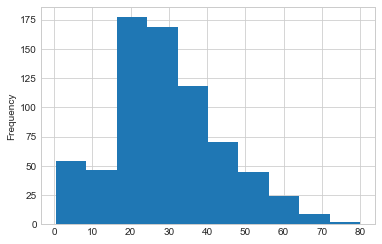

In [9]:
# plotting histogram on basis of age
train.Age.plot.hist()

In [10]:
#viewing the test data 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
#vewing the sample submission data frames
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data description

#### Survival
0 = NO, 1 =Yes

#### passengerclass(ticket class) 
1 =1st, 2 = 2nd, 3 = 3rd 

sex: SEX

Age: Age in years

sibsp: number of siblings/spouses aboard the titanic

parch: number of parents/children aboard the titanic

Ticket:Ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: port of boarding, C= cherbourg, Q = Queenstown, S = southampton

In [12]:
# general description of training data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Lets find the missing values

there are rows which aremissing a value or have NaN instead of something like the rest of the column

<AxesSubplot:>

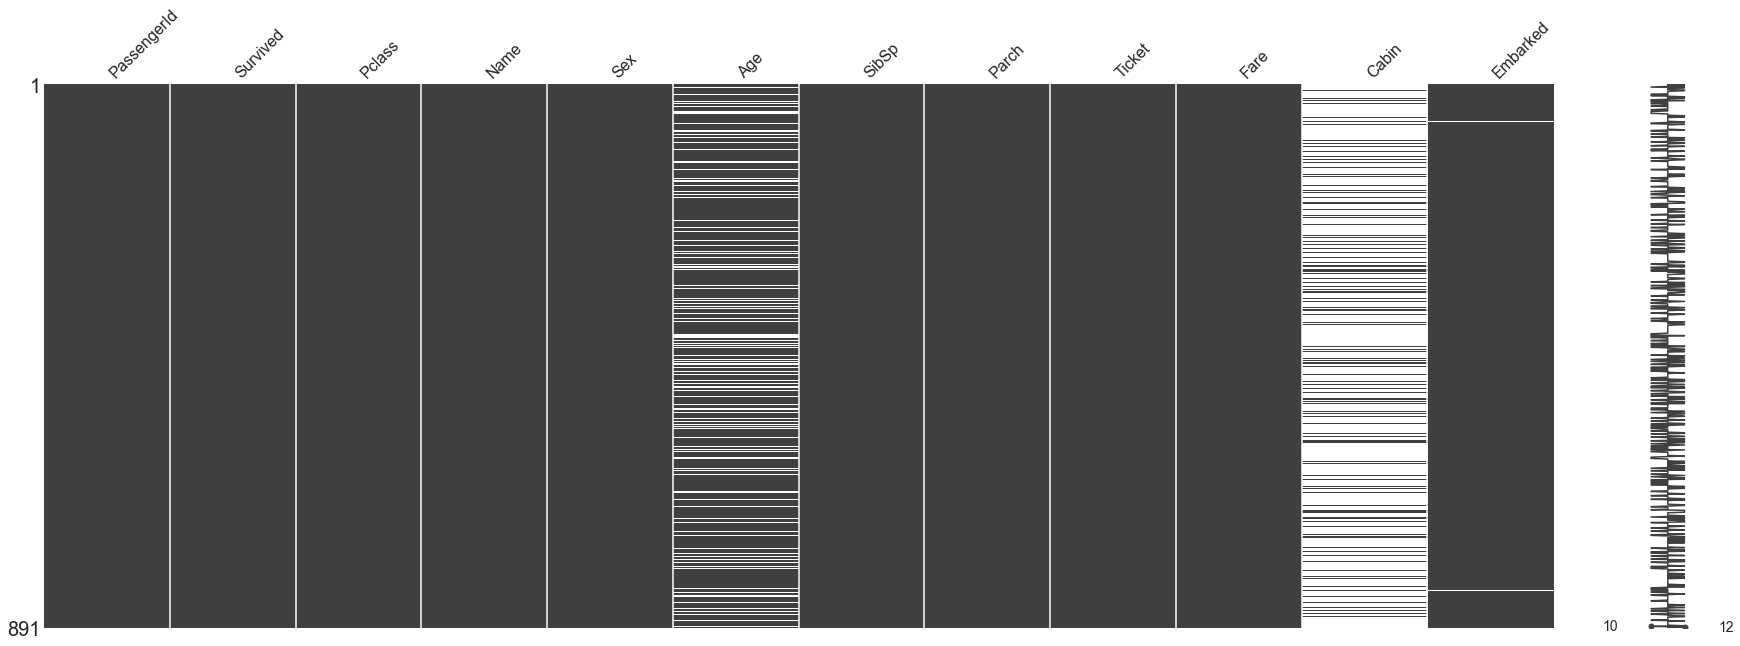

In [13]:
# plotting the graphic of missing values

# we will use missingno for visualization 
missingno.matrix(train, figsize =(30,10))

Ok we can clearly see some missing values here. Especially in the cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

knowing this information will help with your EDA and figuring out data neending for cleaning purposes


In [15]:
# alternatively we can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## To perform our data analysis, let's create two new dataframes

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables

In [22]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

this shows the the count of null/NaN values inside the dataset

## Lets look after what type of datatype are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind.


In [16]:
#different datatypes in the dataset

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Target Feature: Survived

description: whether the passenger survived or not

Key: 0=did not survive, 1=survived

this is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


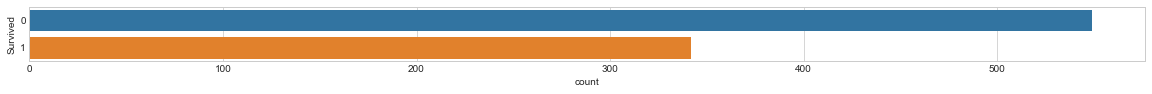

In [20]:
# lets plot a graph of how many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data = train);
print(train.Survived.value_counts())

In [23]:
# kets add this to our subset dataframes 
# creating a subset of survival column

df_bin['Survived']= train['Survived']
df_con['Survived']= train['Survived']

In [24]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [25]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Feature: Pclass
Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

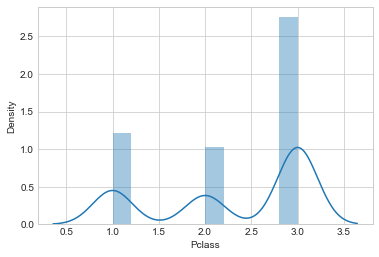

In [26]:
sns.distplot(train.Pclass) #distribution chart according to passenger class

We can see with this feature, the values are numerical (1, 2 and 3) but they are categories.

How do we know this? Because a passenger in Class 3 doesn't necessarily equal a passenger in Class 2 + a passenger in Class 1.

In [27]:
# how many missing varirables does Pclass have?

train.Pclass.isnull().sum()

0

Since there are no missing values in Pclass, let's add it to our sub dataframes.

In [28]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

## Feature: Name
 description: the name of the passenger

In [30]:
# how many different names are there?

train.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

Every row has a unique name. This is equivalent to the passenger ID. But name could be used differently.

Can you think of ways you could reduce the number of different names? Or create new features out of the names?

Note: Because of so many different names and to keep this EDA fast, we won't move forward using the name variable

### Feaute: Sex

Description: the sex of the passenger(male or female)

<AxesSubplot:xlabel='count', ylabel='Sex'>

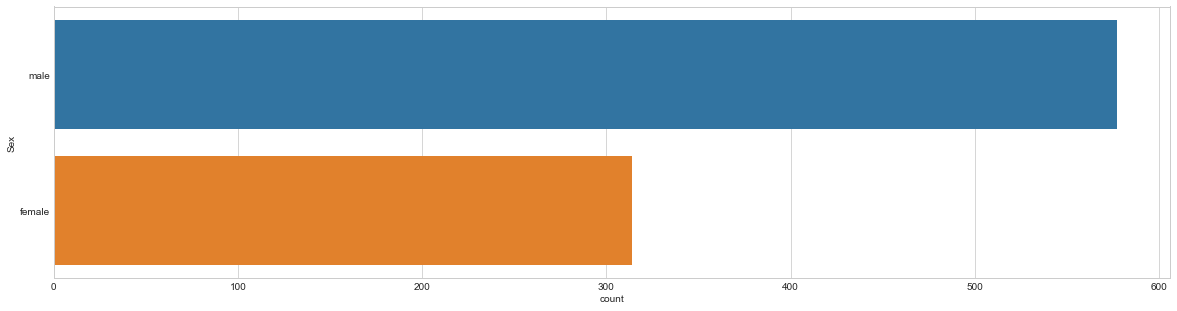

In [32]:
#lets plot the distribution of sex

plt.figure(figsize=(20,5))
sns.countplot(y='Sex',data=train)

In [35]:
# lets find are there any null values in the sex column
train.Sex.isnull().sum()

0

In [36]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [37]:
# lets add sex to the subset data frame

df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex']=='female',1,0)
# change  sex to 0 for male and 1 for female

df_con['Sex']= train['Sex']

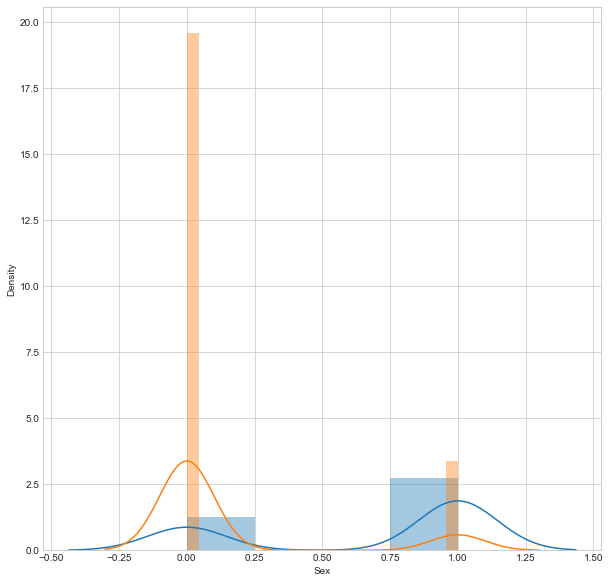

In [39]:
 #How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});


## Feature: Age

Description: age of passenger

In [40]:
train.Age.isnull().sum()

177

Out of a total 891 rows, that's almost one quarter of the dataset.

What would you do with these missing values?

Lets replace the missing age values with the mean"

In [49]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [50]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now you can see the age section has no null values

as we have replaced all the null values int the section by the mean age


In [51]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.

df_bin['Age'] = pd.cut(train['Age'], 10) 

# bucketed/binned into different categories

df_con['Age'] = train['Age'] # non-bucketed

## Function to create count and distribution visualisation

In [52]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

## Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [53]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [54]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [55]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']


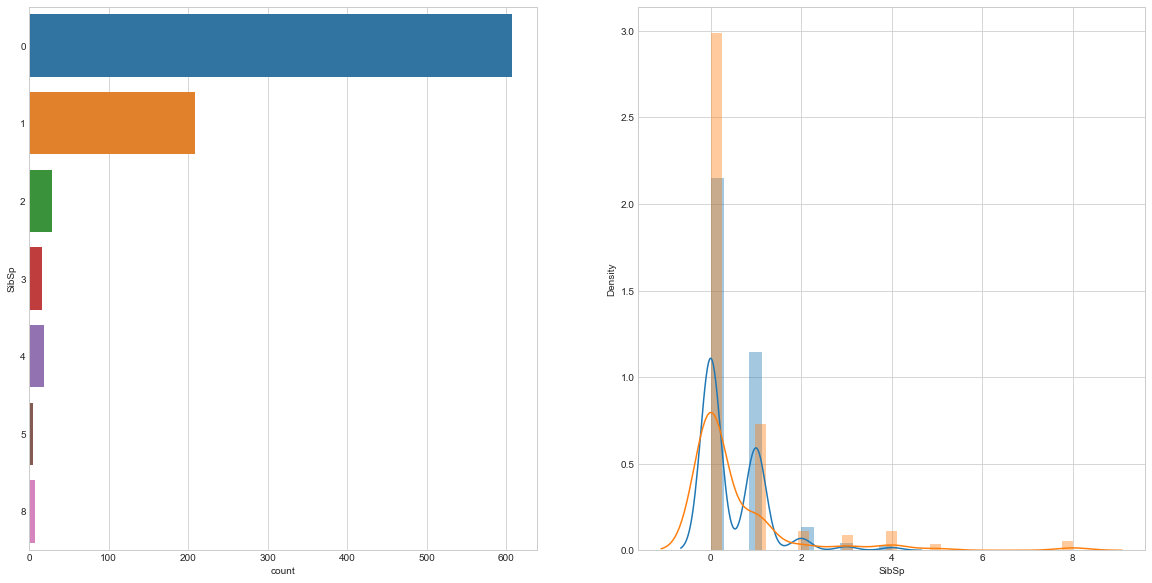

In [56]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


### Feature: Ticket
Description: The ticket number of the boarding passenge

In [59]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

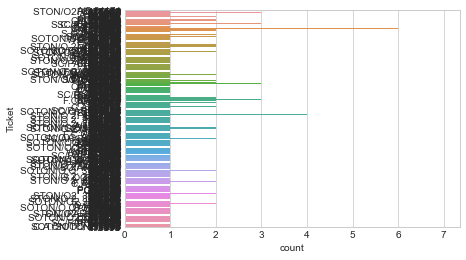

In [60]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

In [61]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

## Feature: Fare
Description: How much the ticket cost.

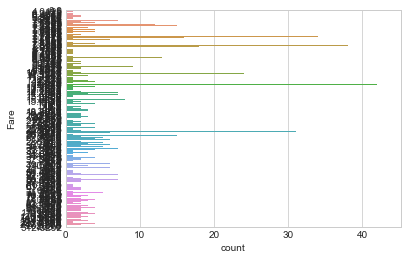

In [62]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [63]:

# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [64]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [65]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

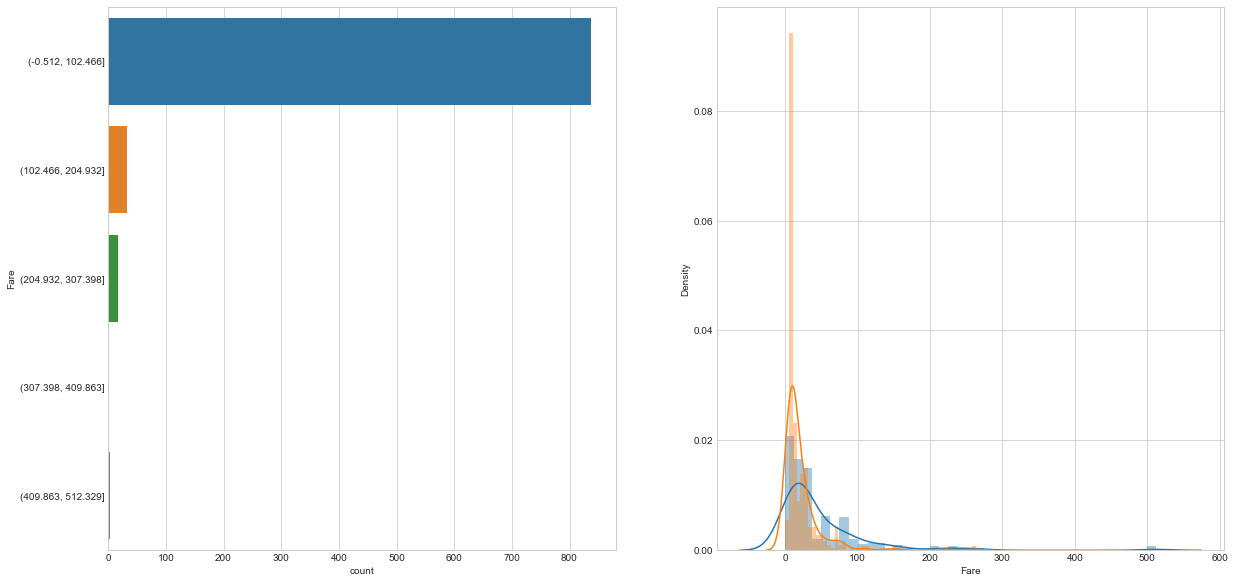

In [66]:
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

### Feature: Cabin
Description: The cabin number where the passenger was staying.

In [67]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()


687

In [68]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# What do the Cabin values look like?
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

### Feature: Embarked
Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [70]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [71]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

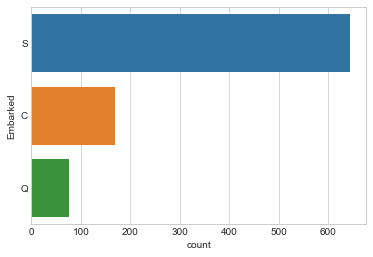

In [72]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

### How can we deal with the 2 missing values of Embarked?
One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

What are the pros and cons of each?

For now, we will remove those rows 

In [73]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [75]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub dataframes.



## Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (df_bin) with one-hot encoding and our continuous dataframe (df_con) with the label encoding function from sklearn.

In [76]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,0,"(16.336, 24.294]",1,"(-0.512, 102.466]",S
1,1,1,1,"(32.252, 40.21]",1,"(-0.512, 102.466]",C
2,1,3,1,"(24.294, 32.252]",0,"(-0.512, 102.466]",S
3,1,1,1,"(32.252, 40.21]",1,"(-0.512, 102.466]",S
4,0,3,0,"(32.252, 40.21]",0,"(-0.512, 102.466]",S


In [77]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"Age_(0.34, 8.378]","Age_(8.378, 16.336]","Age_(16.336, 24.294]","Age_(24.294, 32.252]",...,SibSp_5,SibSp_8,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [79]:
df_con.head(10)
            

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.000000,1,7.2500,S
1,1,1,female,38.000000,1,71.2833,C
2,1,3,female,26.000000,0,7.9250,S
3,1,1,female,35.000000,1,53.1000,S
4,0,3,male,35.000000,0,8.0500,S
5,0,3,male,29.699118,0,8.4583,Q
6,0,1,male,54.000000,0,51.8625,S
7,0,3,male,2.000000,3,21.0750,S
8,1,3,female,27.000000,0,11.1333,S
9,1,2,female,14.000000,1,30.0708,C


In [80]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [81]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [82]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,Age,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.000000,1,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,53.1000,0,0,1,1,0,1,0,0
4,0,35.000000,0,8.0500,0,0,1,0,1,0,0,1
5,0,29.699118,0,8.4583,0,1,0,0,1,0,0,1
6,0,54.000000,0,51.8625,0,0,1,0,1,1,0,0
7,0,2.000000,3,21.0750,0,0,1,0,1,0,0,1
8,1,27.000000,0,11.1333,0,0,1,1,0,0,0,1
9,1,14.000000,1,30.0708,1,0,0,1,0,0,1,0


# Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

## _____________________________________________________________________________

## Let's seperate the data

In [83]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [84]:
selected_df.head()

,Survived,Age,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,22.0,1,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,53.1000,0,0,1,1,0,1,0,0
4,0,35.0,0,8.0500,0,0,1,0,1,0,0,1


In [85]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [86]:
# Shape of the data (without labels)
X_train.shape

(889, 11)

In [87]:
X_train.head()

,Age,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,8.0500,0,0,1,0,1,0,0,1


In [88]:
# Shape of the labels
y_train.shape

(889,)

## Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [89]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

# Logistic Regression

In [90]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.87
Accuracy CV 10-Fold: 79.75
Running Time: 0:00:04.408716


# K-Nearest Neighbours

In [91]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.11
Accuracy CV 10-Fold: 71.32
Running Time: 0:00:00.191352


# Gaussian Naive Bayes

In [92]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.97
Accuracy CV 10-Fold: 78.52
Running Time: 0:00:00.042161


# Linear Support Vector Machines (SVC)

In [93]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 67.04
Accuracy CV 10-Fold: 76.38
Running Time: 0:00:00.191456


# Stochastic Gradient Descent

In [94]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 72.67
Accuracy CV 10-Fold: 69.85
Running Time: 0:00:00.058015


# Decision Tree Classifier

In [95]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.09
Accuracy CV 10-Fold: 78.4
Running Time: 0:00:00.130970


 # Gradient Boosting Trees


In [96]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.65
Accuracy CV 10-Fold: 82.68
Running Time: 0:00:00.565204


## CatBoost Algorithm

CatBoost is a state-of-the-art open-source gradient boosting on decision trees library

In [97]:
# View the data for the CatBoost model
X_train.head()

,Age,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,8.0500,0,0,1,0,1,0,0,1


In [98]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [99]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

This means Catboost has picked up that all variables except Fare can be treated as categorical.



In [100]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [101]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [102]:

# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6861259	total: 99.7ms	remaining: 1m 39s
1:	learn: 0.6791424	total: 125ms	remaining: 1m 2s
2:	learn: 0.6730819	total: 147ms	remaining: 48.8s
3:	learn: 0.6670607	total: 177ms	remaining: 44s
4:	learn: 0.6602638	total: 199ms	remaining: 39.6s
5:	learn: 0.6549466	total: 221ms	remaining: 36.6s
6:	learn: 0.6496439	total: 242ms	remaining: 34.3s
7:	learn: 0.6443729	total: 263ms	remaining: 32.7s
8:	learn: 0.6413171	total: 279ms	remaining: 30.7s
9:	learn: 0.6362063	total: 300ms	remaining: 29.7s
10:	learn: 0.6333087	total: 312ms	remaining: 28s
11:	learn: 0.6294133	total: 334ms	remaining: 27.5s
12:	learn: 0.6266422	total: 343ms	remaining: 26.1s
13:	learn: 0.6216990	total: 362ms	remaining: 25.5s
14:	learn: 0.6174666	total: 391ms	remaining: 25.7s
15:	learn: 0.6132308	total: 413ms	remaining: 25.4s
16:	learn: 0.6107147	total: 422ms	remaining: 24.4s
17:	learn: 0.6066865	total: 456ms	remaining: 24.9s
18:	learn: 0.6017328	total: 499ms	remaining: 25.8s
19:	learn: 0.

# Perform CatBoost cross-validation

In [103]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6757582	test: 0.6778039	best: 0.6778039 (0)	total: 19.3ms	remaining: 19.3s
1:	learn: 0.6558377	test: 0.6602231	best: 0.6602231 (1)	total: 55.8ms	remaining: 27.8s
2:	learn: 0.6456005	test: 0.6520539	best: 0.6520539 (2)	total: 70.5ms	remaining: 23.4s
3:	learn: 0.6296463	test: 0.6385877	best: 0.6385877 (3)	total: 95.6ms	remaining: 23.8s
4:	learn: 0.6160362	test: 0.6263497	best: 0.6263497 (4)	total: 122ms	remaining: 24.2s
5:	learn: 0.6008758	test: 0.6141395	best: 0.6141395 (5)	total: 144ms	remaining: 23.9s
6:	learn: 0.5872381	test: 0.6011754	best: 0.6011754 (6)	total: 175ms	remaining: 24.9s
7:	learn: 0.5745200	test: 0.5917006	best: 0.5917006 (7)	total: 197ms	remaining: 24.5s
8:	learn: 0.5670788	test: 0.5855279	best: 0.5855279 (8)	total: 210ms	remaining: 23.1s
9:	learn: 0.5560908	test: 0.5772633	best: 0.5772633 (9)	total: 231ms	remaining: 22.8s
10:	learn: 0.5435438	test: 0.5666655	best: 0.5666655 (10)	total: 252ms	remaining: 22.7s
11:	learn: 0.5349374	tes

In [104]:
# lets Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 87.74
Accuracy cross-validation 10-Fold: 83.46
Running Time: 0:04:48.374264


## Model Results
Which model had the best cross-validation accuracy?

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.

In [105]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,98.09
6,Gradient Boosting Trees,89.65
7,CatBoost,87.74
0,KNN,82.11
1,Logistic Regression,79.87
2,Naive Bayes,78.97
3,Stochastic Gradient Decent,72.67
4,Linear SVC,67.04


In [106]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,83.46
6,Gradient Boosting Trees,82.68
1,Logistic Regression,79.75
2,Naive Bayes,78.52
5,Decision Tree,78.40
4,Linear SVC,76.38
0,KNN,71.32
3,Stochastic Gradient Decent,69.85


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the .fit() models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

## Feature Importance
Which features of the best model were most important for making predictions?

In [111]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
4,0.842125,embarked_Q
3,1.404266,embarked_C
9,2.472642,pclass_2
5,2.487630,embarked_S
8,4.179717,pclass_1
10,8.759370,pclass_3
1,12.758741,SibSp
2,14.925965,Fare
0,16.592301,Age
6,17.342821,sex_female


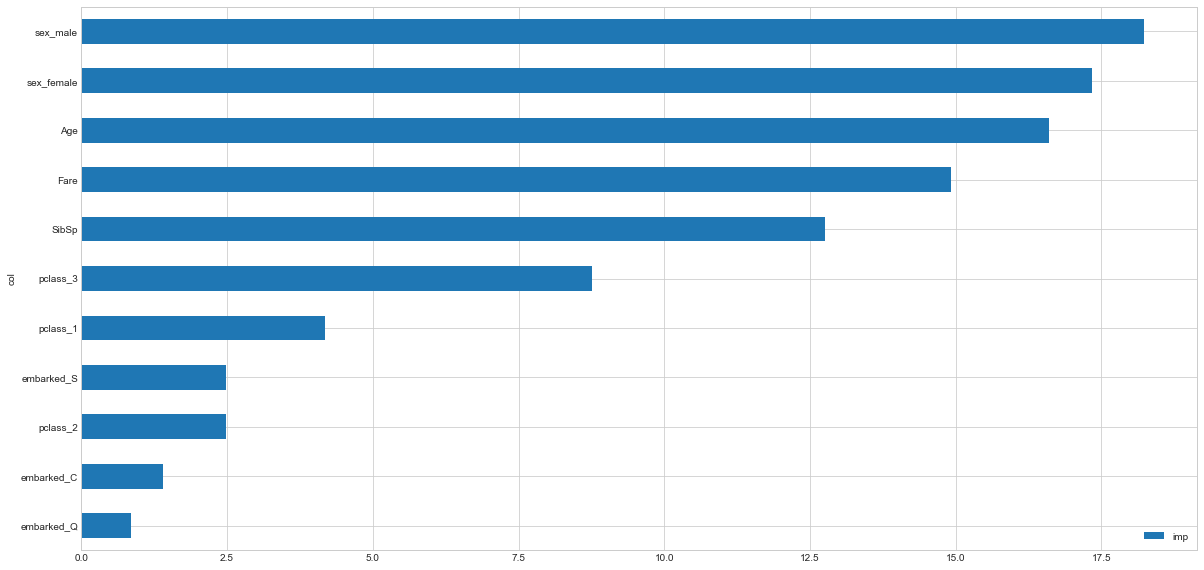

In [112]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

## Why would you want feature importance?
Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

# Precision and Recall
Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

### Recall 

Recall= a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

### Precision

Precision = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an F1 score.

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [113]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8670267461430395
Recall: 0.7167823529411764
F1: 0.7846771401972538
AUC: 0.9064874370513233


## Submission
Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the test dateframe, encode them and make a prediciton with our model.

In [114]:
# We need our test dataframe to look like this one
X_train.head()


,Age,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,8.0500,0,0,1,0,1,0,0,1


In [115]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [117]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [118]:
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


The columns in test have been converted to the same format at df_con_enc. Now we can make predictions on the test dataframe columns we built a model on.

We can find the columns we made predictions on with X_train.columns.

In [119]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [120]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [121]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [122]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [123]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We need our submission dataframe to look like the gender_submisison dataframe, so we'll turn the Survived column into integers.

In [124]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [125]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [126]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")


Submission dataframe is the same length as test (418 rows).


In [130]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv(r"F:\kaggle_titanic_dataset\catboost_submission.csv", index=False)
print('Submission CSV is ready!')



Submission CSV is ready!


In [131]:
submissions_check = pd.read_csv(r"F:\kaggle_titanic_dataset\catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
